In [7]:
import requests
import json
import time
import matplotlib.pyplot as plt
from datetime import datetime

# Helper function to fetch data for a specific ASN and time range
def fetch_bgp_update_data(asn, start_time, end_time, sampling_period=3600):
    url = f"https://stat.ripe.net/data/bgp-update-activity/data.json?resource=AS{asn}&starttime={start_time}&endtime={end_time}&sampling_period={sampling_period}"
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()['data']['updates']
    else:
        print(f"Failed to fetch data for AS{asn}: {response.status_code}")
        return []

def plot_bgp_updates(asns, start_date, end_date):
    # Convert dates to UNIX timestamps
    start_time = int(datetime.strptime(start_date, "%Y-%m-%d").timestamp())
    end_time = int(datetime.strptime(end_date, "%Y-%m-%d").timestamp())
    
    # Fetching data for each ASN
    asn_data = {}
    for asn in asns:
        updates = fetch_bgp_update_data(asn, start_time, end_time)
        asn_data[asn] = updates
        time.sleep(1)
    
    # Plotting data for each ASN
    for asn, data in asn_data.items():
        if data:  # Check if data is not empty
            timestamps = [datetime.fromisoformat(update['starttime']).replace(tzinfo=None) for update in data]
            num_announcements = [update['announcements'] for update in data]
    
            plt.figure(figsize=(10, 5))
            plt.plot(timestamps, num_announcements, label='Number of Announcements', marker='o')
            plt.xlabel('Time')
            plt.ylabel('Number of Announcements')
            plt.title(f'BGP Announcements Over Time for ASN {asn}')
            plt.legend()
            plt.grid(True)
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()
        else:
            print(f"No data available for ASN {asn}")


## Haiti earthquake

#### AS27759 and AS52260

14-08-2021

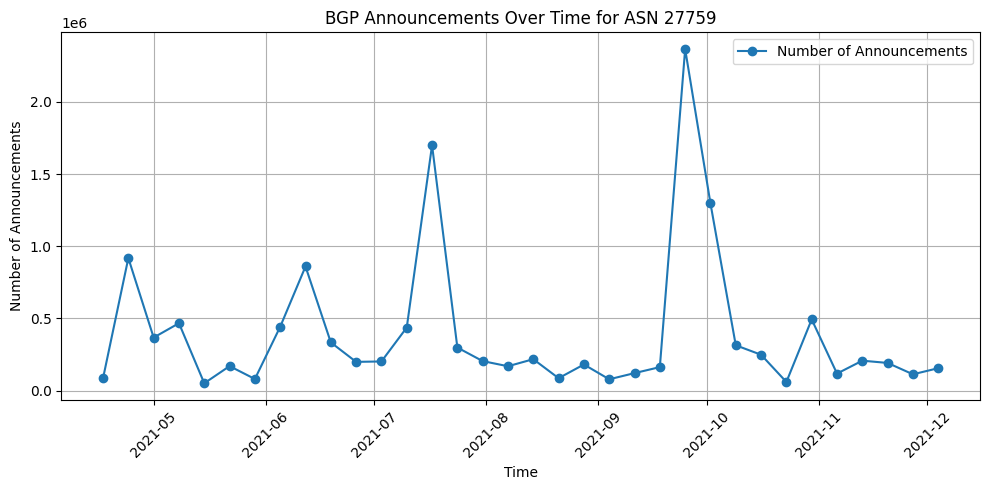

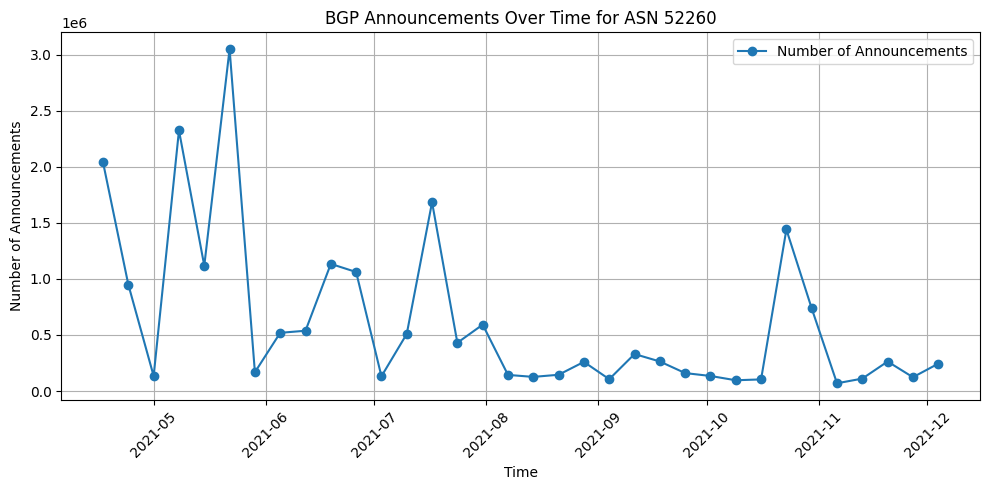

In [8]:
asns = [27759, 52260]
start_date = '2021-04-14'
end_date = '2021-12-14'
plot_bgp_updates(asns, start_date, end_date)

On July 7th, the president of Haiti was assasinated which may be the reason for the rise in BGP announcements in July. This may be due to governments imposing restrictions on specific ISPs or internet access which caused a changed in routing policies and a high number of BGP announcements. It may also be due to censorship and control over internet resources causing ISPs to reroute traffic through different paths. However, during the floods in August, there was no increase in the number of BGP announcements for either of the ASNs. This may be because Les Cayes was the region that was most severely damaged and ASN27759 only had 16 IP addresses of 179,712 IP addresses located there. This limited portion of IP addresses would likely have a minimal impact on the overall number of BGP announcements, which shows that the ASNs may be designed for localized disruptions. At least 137,500 buildings were damaged or destroyed but we can not confirm from the data if any network faults occured. Furthermore, for the ASN52260, the peak in October may be due to celebrations of Dessalines day. This change may be due to increase in internet usage or due to security measures which might cause ISPs to temporarily change routing policies to handle the increased load or due to security measures. There were no other ASNs that had IP addresses lcoated in this region.

## Super Typhoon Rai

#### AS4775 and AS9299

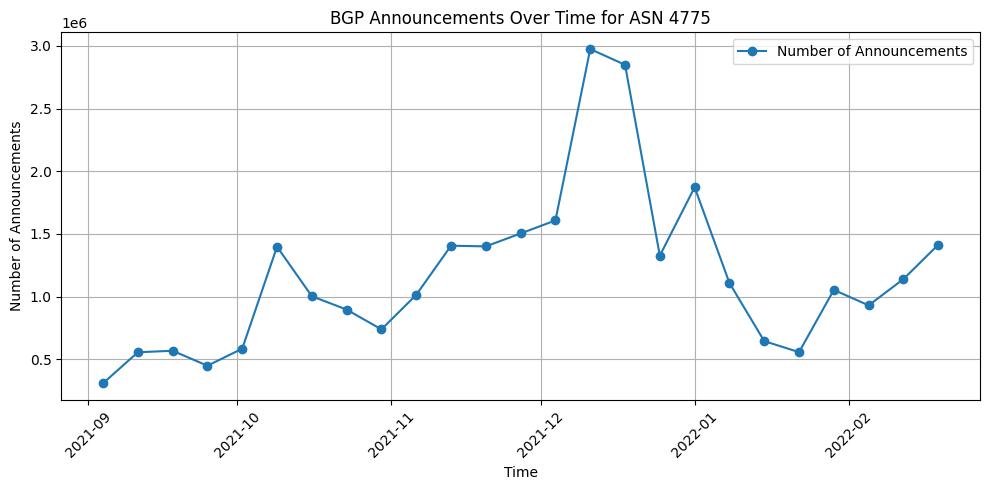

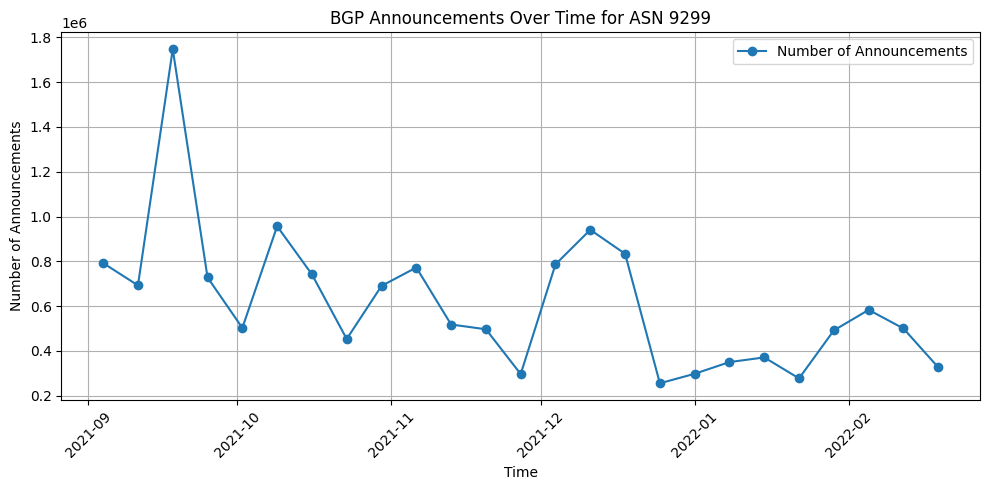

In [9]:
asns = [4775, 9299]
start_date = '2021-09-01'
end_date = '2022-03-01'
plot_bgp_updates(asns, start_date, end_date)

Both ASNs show peaks on the date the typhoon hit. The peak for ASN 4775 is much more prominent compared to the peak of ASN 9299. ASN 4775 posseses about 1500 IP addresses in the region of the typhoon while ASN 9229 has about 7500 IP addresses. The typhoon resulted in severe destruction of infrastructure including more than 90 percent of the buildings on the island. The connectivity was severely disrupted which can be seen by the increased number of announcements. The ASN 9299 also shows a prominent peak in September 2021 which corresponds to another typhoon which struck the region of Manila where this ASN possesses 4.1 million IP addresses. Due to the large number of IP addresses, a prominent peak is visible.

## Indonesia: Earthquake and Tsunami

#### AS38496	and AS7713

28-09-2018 and 22-12-2018

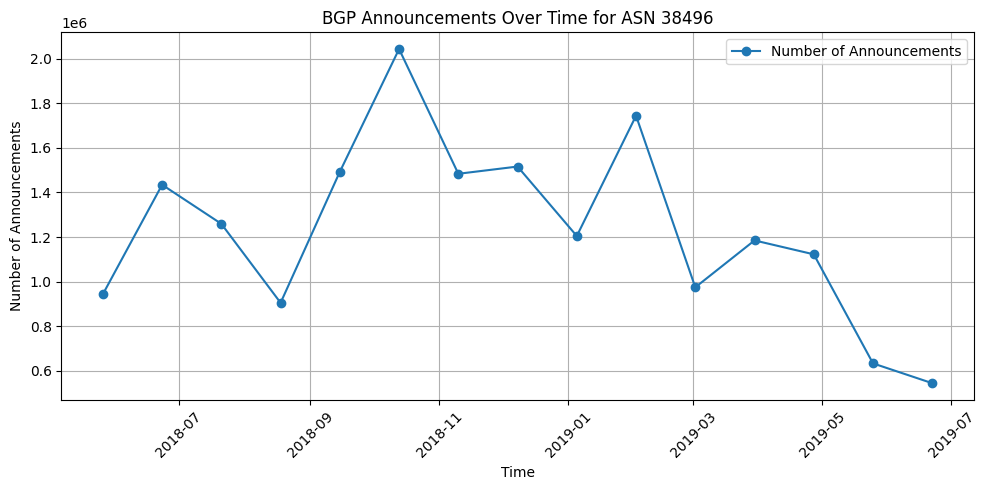

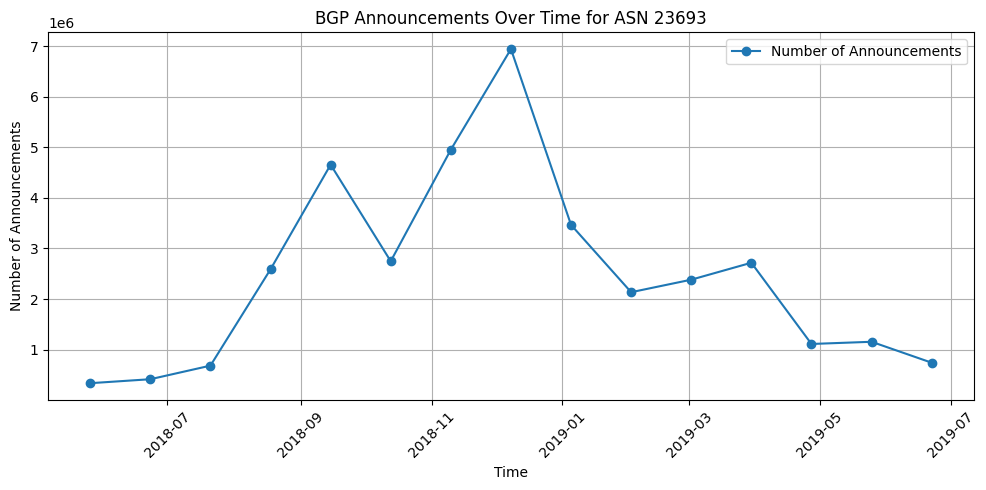

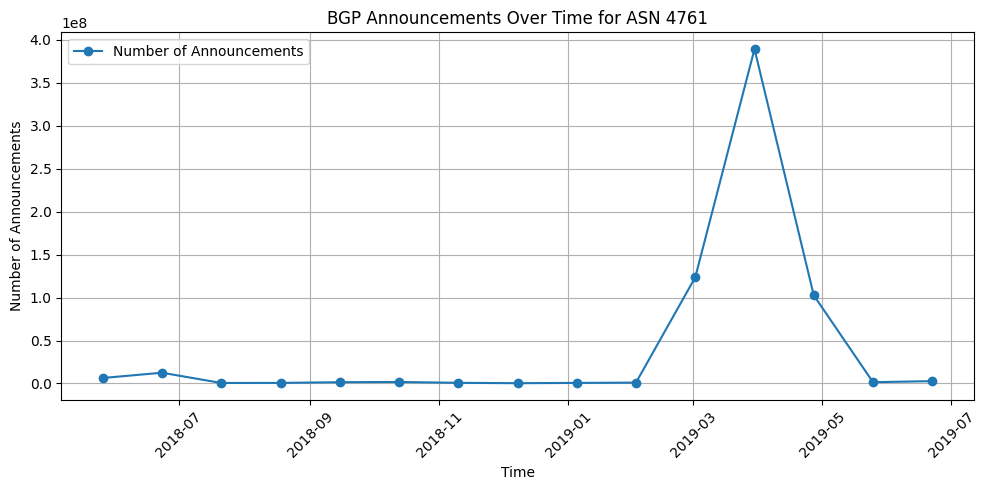

In [10]:
asns = [38496, 23693, 4761]
start_date = '2018-05-01'
end_date = '2019-08-01'
plot_bgp_updates(asns, start_date, end_date)

In 2018, there were 2 major earthquakes in the 9th and 12th months which majorly affected Central Sulawesi. ASN38496 shows a rise in BGP announcements in September although no visible rise in December, this may suggest that the infrastructure was affected more in September than December for that specific ISP. We can see BGP announcements rising in January and February again which can be due to the tornado in Rancaekek on January 11th and flooding, earthquakes and landslides in February. ASN26393 had a high number of IP addresses in Central Sulawesi: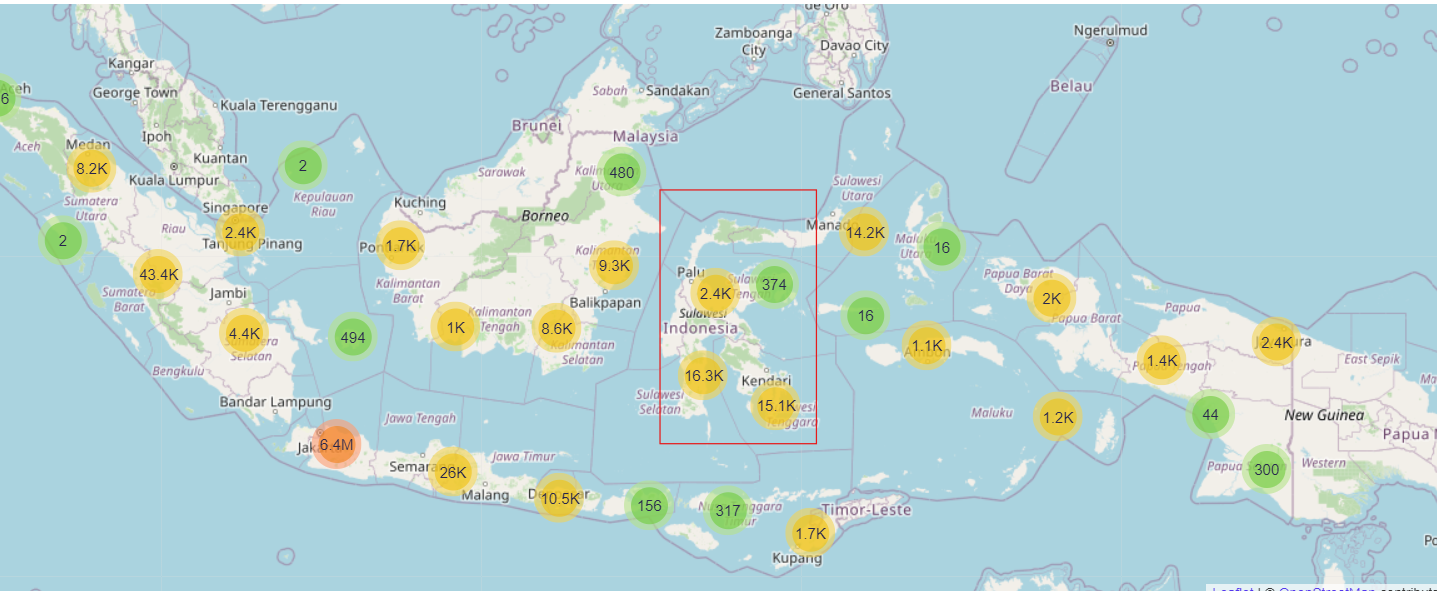 so the peaks are more prominent for this ASN in the months of September and December. We can see two separate peaks for both months while we can see a small increase in February as well. The state-owned Telkomsel reported that more than 500 wireless communication towers had been damaged by the earthquake. ASN4761 has a prominent peak which starts in the month of February. The ASN seems to have been dormant for the majority of the time but a sudden event required rerouting through this ASN. The only prominent event that took place during this time were the general elections being held on April 17th 2019.

## Turkey–Syria earthquakes

#### AS44620 and AS9121 (Turkey) --- AS29256 (Syria)

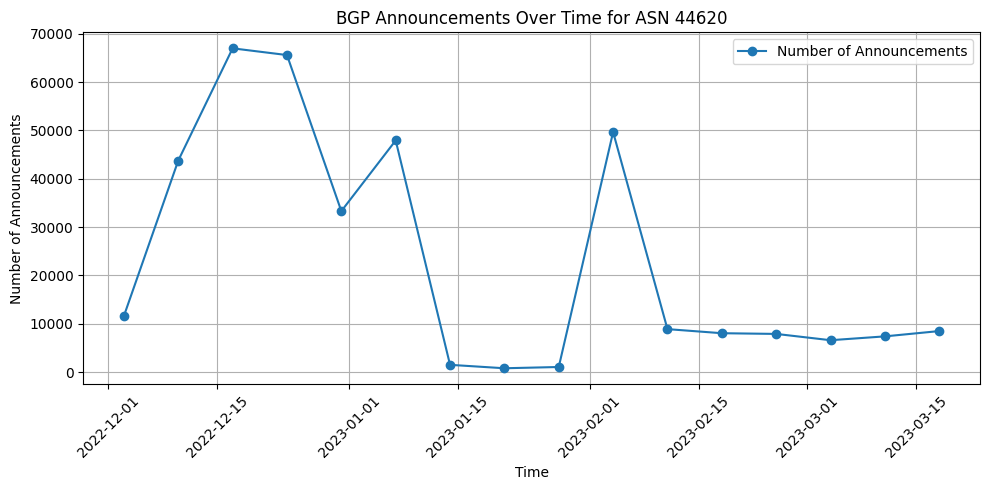

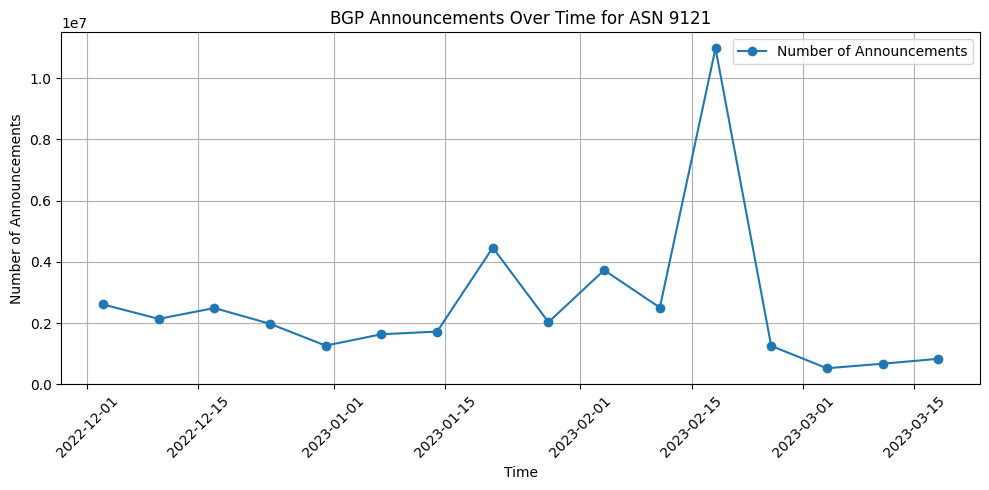

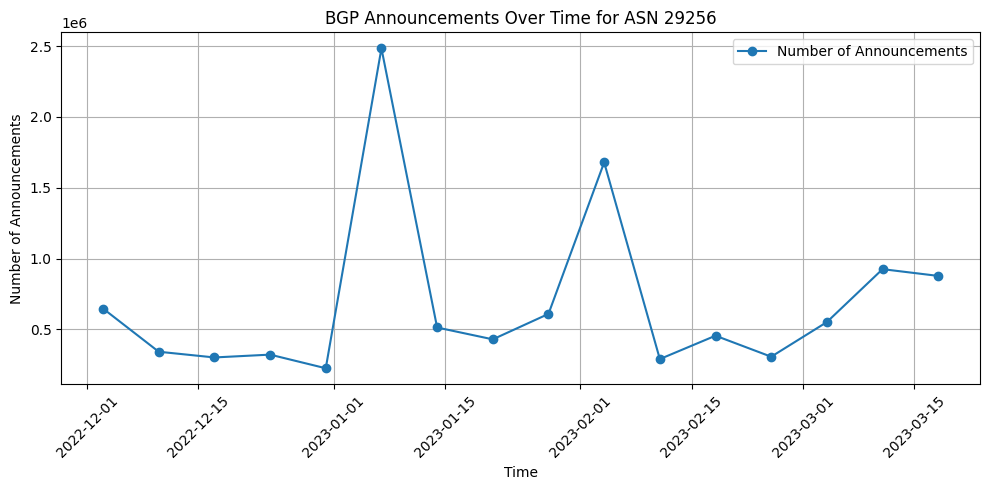

In [11]:
asns = [44620, 9121, 29256]
start_date = '2022-12-01'
end_date = '2023-04-01'
plot_bgp_updates(asns, start_date, end_date)

A 7.8 Mw earthquake struck southern and central Turkey and northern and western Syria on February 6, 2023. ASNs 44620 and 29256 show an increase in the number of announcements on the day the earthquake. The ASN 29256 is a Syrian ASN with about 2 million IP addresses in northern and western Syria. ASNs 9121 and 44620 are Turkish ASNs and show very prominent peaks on and a few days after the earthquake. ASN 9121 possesses about 3 million IP addresses in southern and central Turkey while ASN 9121 p
ossesses about 3 million IP addresses and ASN 44620 does not possess as many IP addresses in central or southern Turkey. It is an overall samller ASN as can be seen in its lower number of overall announcements but a peak is still visible on the day of the earthquake. According to Cloudflare. Turkey suffered a major internet disruption due to the earthquake, traffic fell by 94% in the Kahramanmaraş Province after which many telcos took measures to improve the situation. Domestic mobile and landline calls were made free, and WiFi hotspots in affected regions ewre provided.

## Hurricane Mathew

#### AS27759 and AS52260

28-09-2016 till 09-10-2016

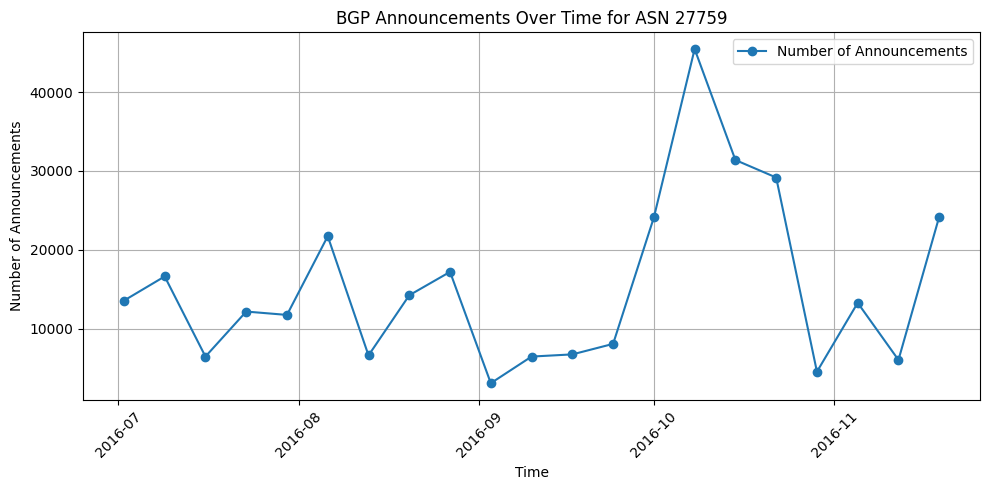

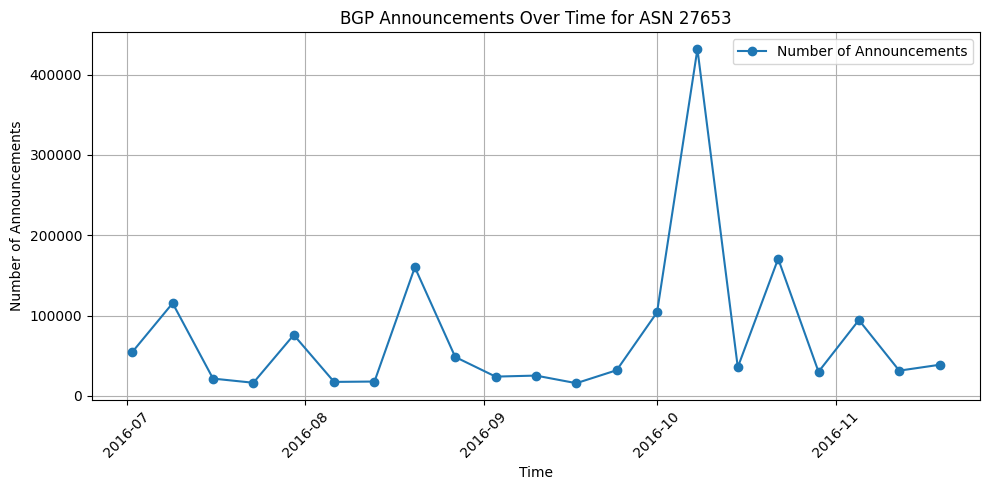

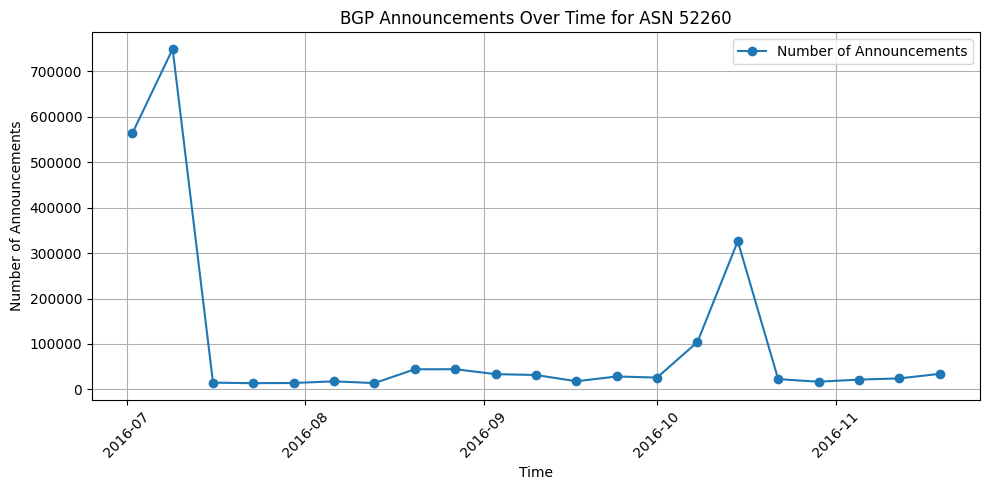

In [12]:
asns = [27759, 27653, 52260]
start_date = '2016-07-01'
end_date = '2016-12-01'
plot_bgp_updates(asns, start_date, end_date)

Hurricane Matthew struck the South-Western side of Haiti. The hurricane reached Haiti on the 28th of September. It reached the far South-West of the country where there were no major IP allocations from any of these ASNs. We can see from the plot of AS27759, that the BGP announcements start increasing on approximately the 28th of September, the date the hurricane struck Haiti. We can further see an increase till approximately 40000 BGP announcements till ~10th of October. After this the Hurricane started to settle but the BGP announcements took some time to go back to their normal levels. A similar trend can be seen for AS27653 where the announcements start on ~28th of September and reach maximum on ~10th of October. However, it does not take much to go back to normal levels. For AS5260, we can see a state of dormancy and BGP announcements only start when the Hurricane has reached the end of its strike. It goes back to its state of dormancy after this, maybe due to the normalization of the other ASNs. For reference this is the IP allocation distribution for AS27759: 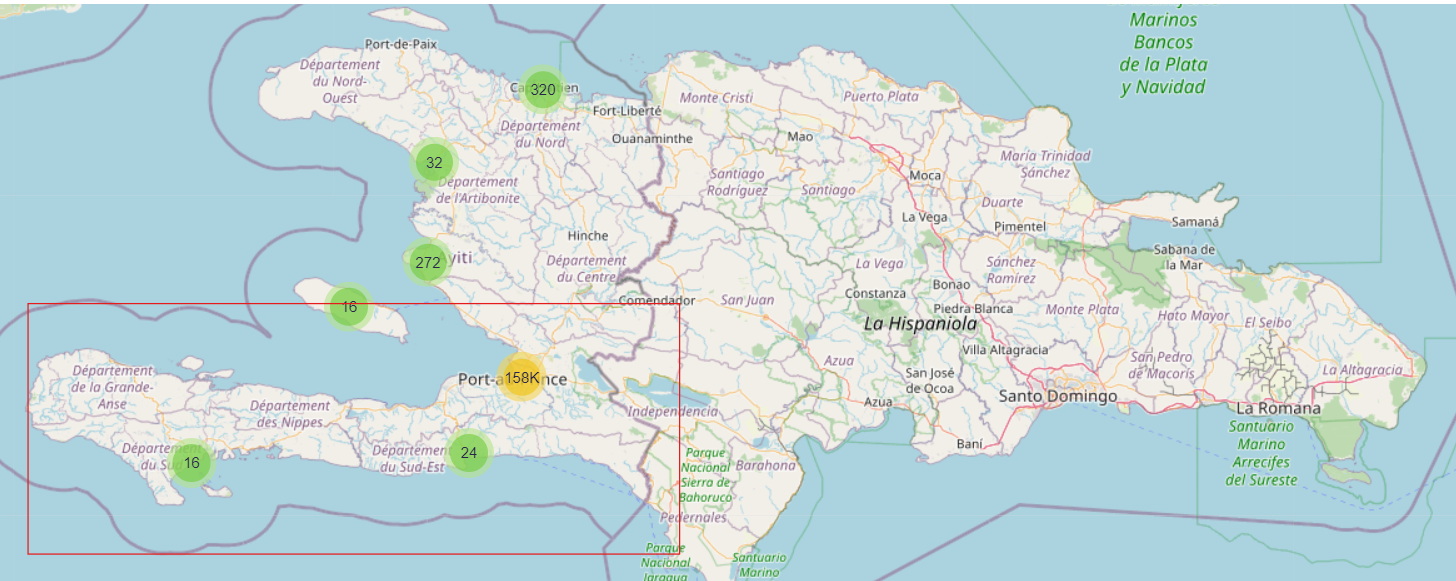. The major impact was on the highlighted region. BGP announements for all the ASNs increased by almost ~40000 from their normal levels.

## Hurricane Katrina

#### AS7018	and AS3549

In [13]:
asns = [7018, 3549]
start_date = '2005-06-01'
end_date = '2005-10-01'
plot_bgp_updates(asns, start_date, end_date)

No data available for ASN 7018
No data available for ASN 3549


## Cyclone Freddy

#### ASN37054 and ASN37037

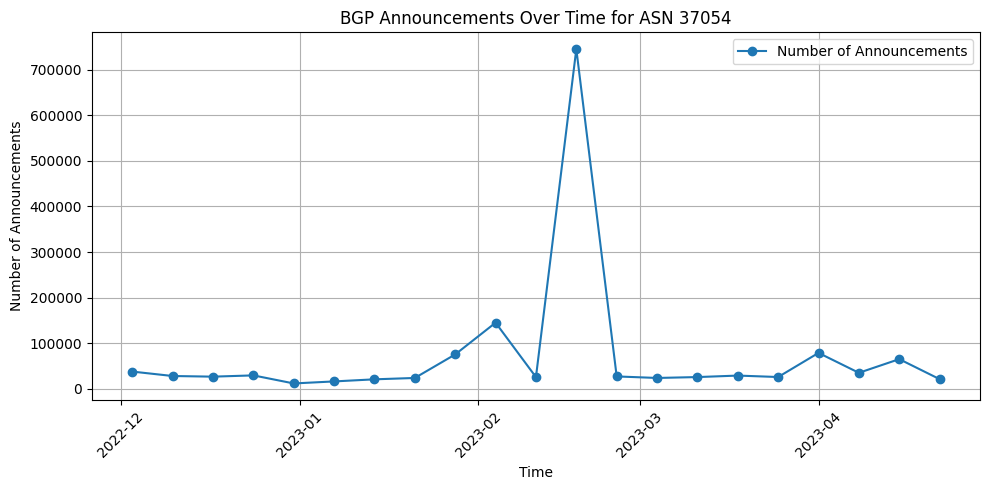

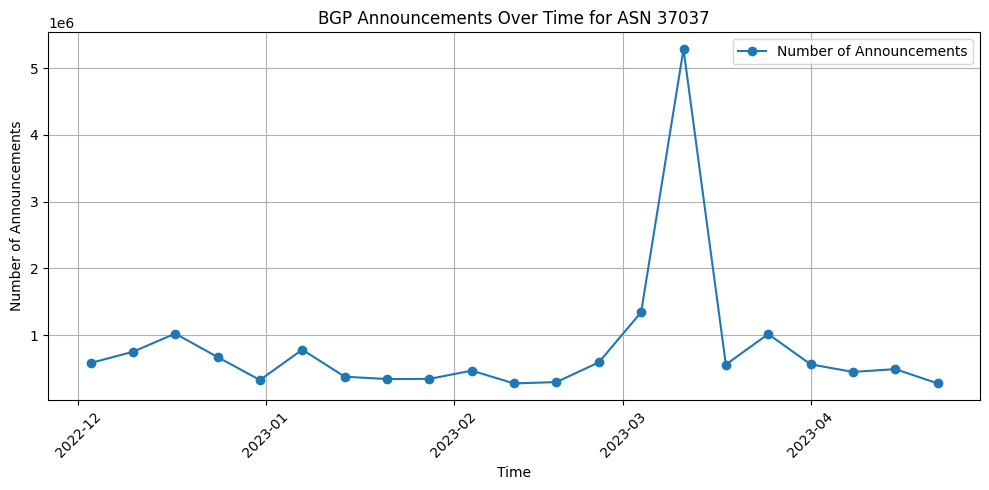

In [14]:
asns = [37054, 37037]
start_date = '2022-12-01'
end_date = '2023-05-01'
plot_bgp_updates(asns, start_date, end_date)

Cyclone Freddy hit Madagascar on 21st February 2023 which further led to a surge of flooding and landslides. The AS 37054 possesses about 1.5 million IP addresses within Madagascar and a 7x surge can be observed in its number of announcements in the duration of the cyclone. The AS 37073 also experiences a similar surge in the number of announcements a few days after the cyclone struck indicating potential disruptions or rerouting of internet traffic in response to the disaster.

## Karachi floods 2020

#### AS17557 and AS9541

August

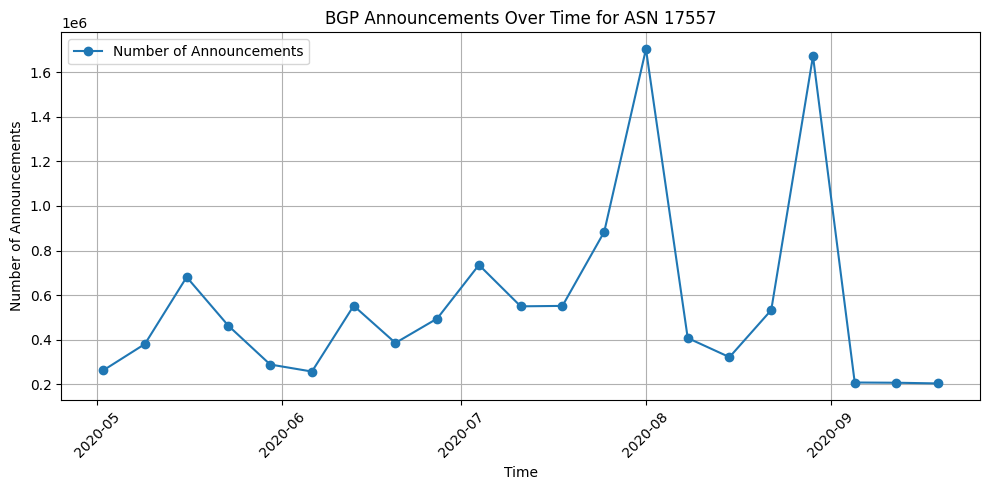

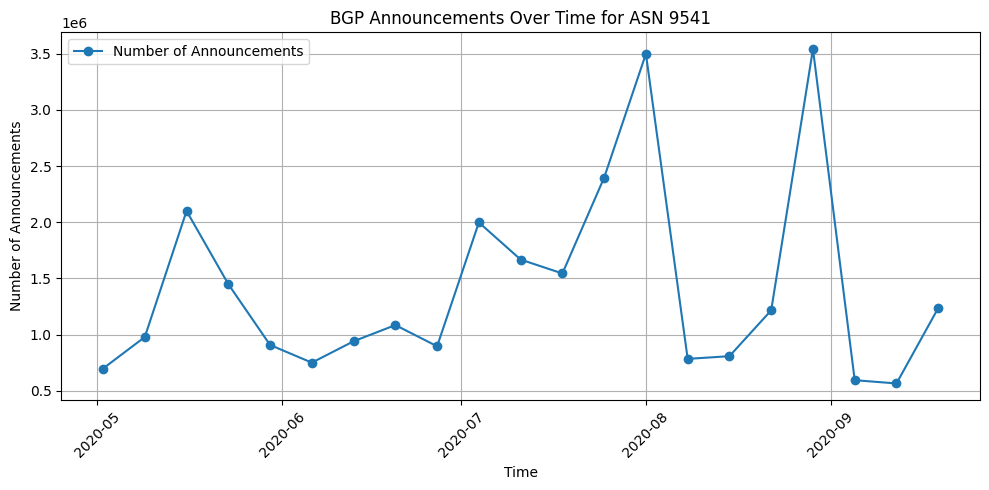

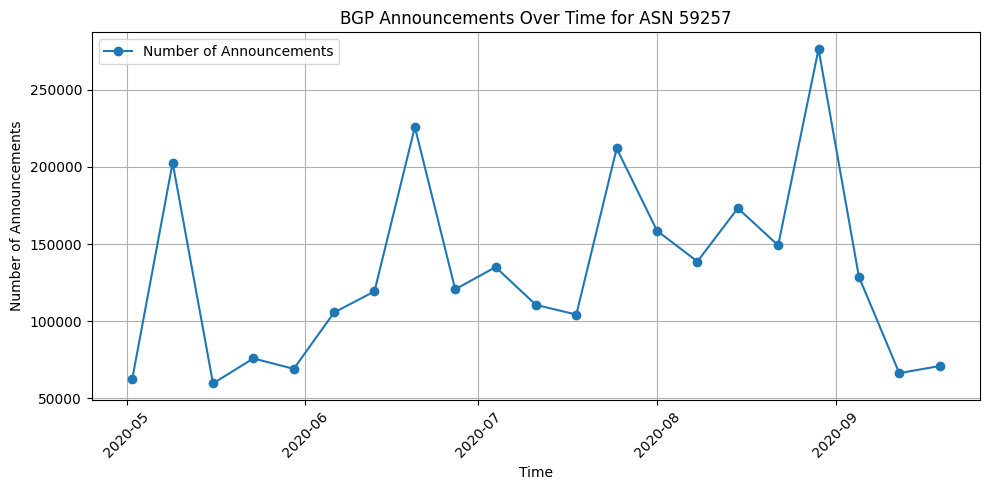

In [15]:
asns = [17557, 9541, 59257]
start_date = '2020-05-01'
end_date = '2020-10-01'
plot_bgp_updates(asns, start_date, end_date)

Both ASNs 17557 (PTCL) and 9541 (Cybernet) show almost the same pattern, indicating minimal fluctuations between June and the middle of July, followed by a peak on ~15th July and another on at ~28th August. The first peak cannot be attributed to any external event except for a terrorist attack that happened that day in which a soldier was killed at Bajaur security post. The second peak is on the same date as when the flooding started which shows that BGP announcements increased during that period which may be due to infrastructural damages causing rerouting of paths. The observed pattern of BGP announcements for ASN 59257 (CMPak Limited) appears consistent with normal operational behavior for an ASN of this size and activity level. It is difficult to assess abnormality due to an external event and the multiple peaks can be attributed to network instability or regular network operations.

## Libya floods/Cyberwar

#### AS21003 and AS37284

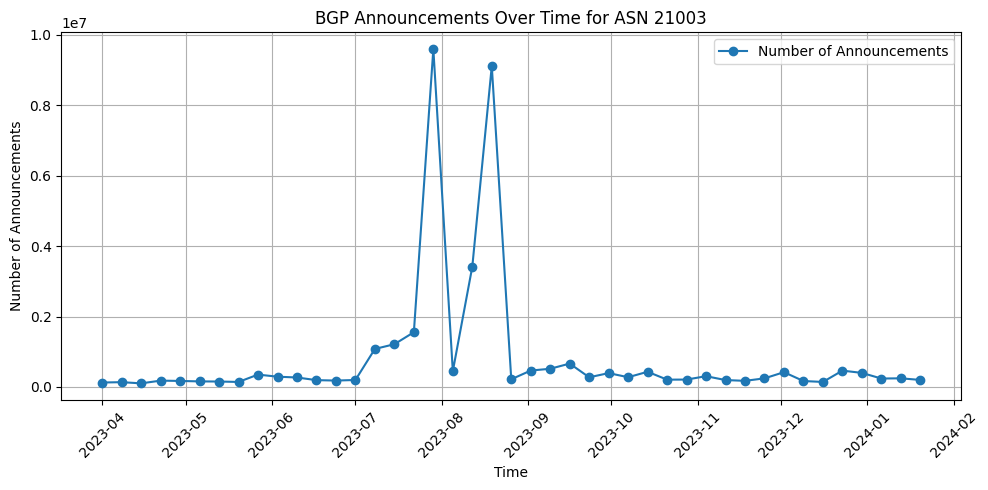

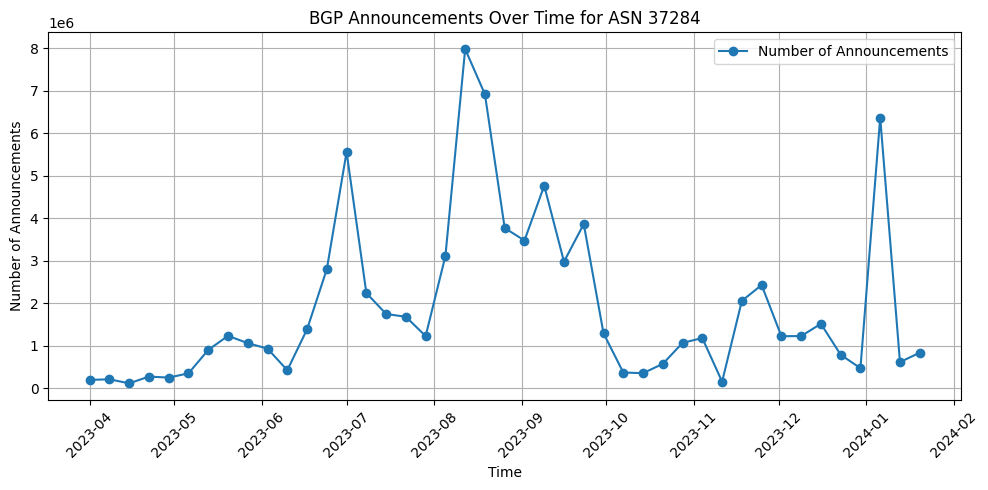

In [16]:
asns = [21003, 37284]
start_date = '2023-04-01'
end_date = '2024-2-01'
plot_bgp_updates(asns, start_date, end_date)

On 10th September 2023, Storm Daniel also hit libya, causing massive havoc and leading to dam breakage and heavy floods that nearly killed 4300 people. The flood also led to communication outages due to severing of fiber optic cables (https://apnews.com/article/libya-derna-floods-069adb76afc3c4ec92956ee4141ad872) and Internet and phone services were knocked out. The most affected city was that of Derna and no ASes have much allocation of IP addressed in that region. ASN 21003 has merely 514 IP addresses in that region while AS 37284 has 384. No peaks can be observed by AS 21003 potentially because of a very small number of IP addresses in the affected region compared to its total IP address provision of 401,665 within Libya. On the other hand small peaks can be observed between September and October potentially indicating the affects of the floods. Both ASes show peaks before September. These can be attributed to the clashes that broke out in Tripoli, Libya, the city with the  highest IP address allocation (386K for AS21003 and 64K for AS37284). These clashes occured between the Special Deterrence Force (RADA) and the 444th Combat Brigade, two of the strongest military forces in the city. The fierce fighting erupted on 14 August until late on 15 August, which forced the city's main airport to close. NSFOCUS spotted an abnormal trend of DDoS attacks against Libya in August, potentially related to the unstable situation. These DDOS attacks may have led to increase in the number of BGP announcements as the targeted network may have experienced significant congestion or even complete outage of certain segments. This can cause routers to repeatedly advertise new routes or withdraw existing ones as they attempt to reroute traffic to maintain connectivity. The constant change in routing information can lead to an increase in BGP announcements. Tripoli was the center of about 90% of these DDos attacks. (https://nsfocusglobal.com/turmoil-in-libya-major-industries-hit-by-massive-ddos-attacks/)

## 2024 Japan Earthquake

#### 2497,2500, 4777, 59105, 151420, 2516, 151381

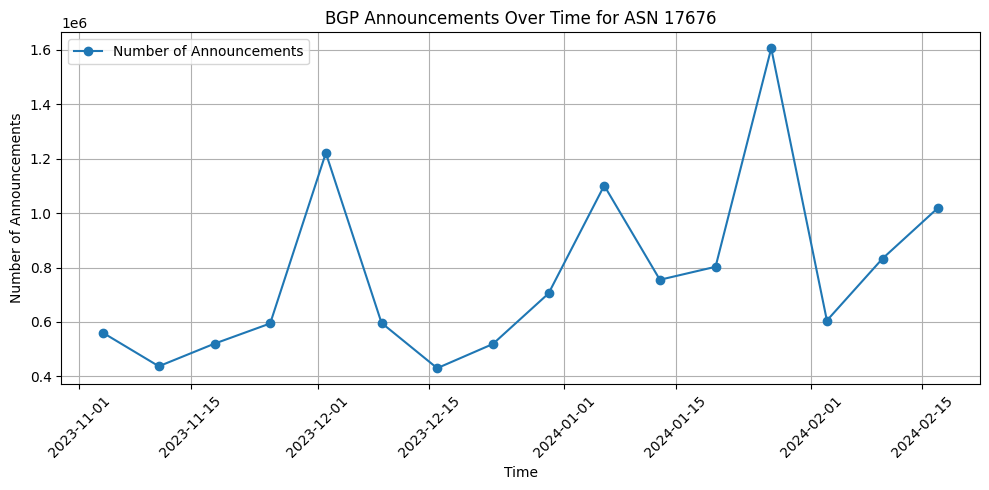

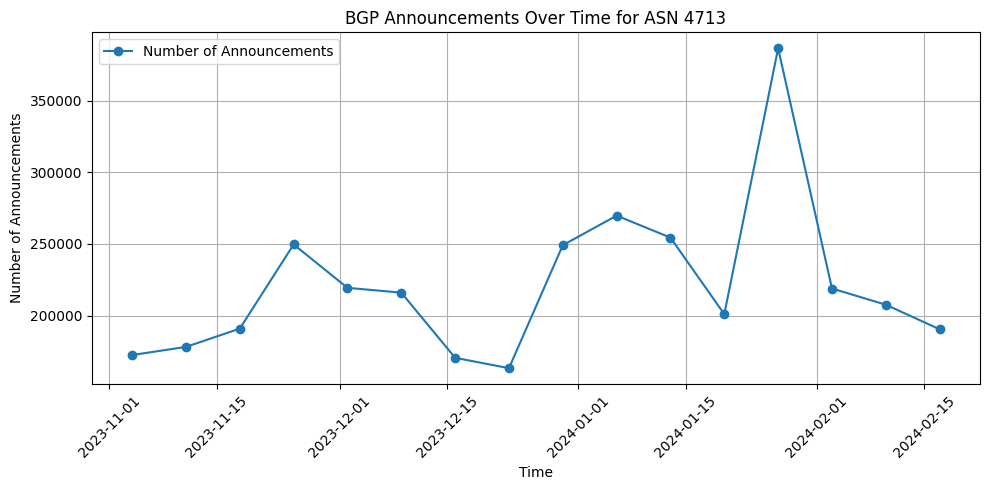

In [17]:
asns = [17676, 4713]
start_date = '2023-11-01'
end_date = '2024-03-01'
plot_bgp_updates(asns, start_date, end_date)

In 2024, a 7.5 magnitude earthquake struck  ne the northern coast of the Noto Peninsula on the west coast of Honshu, Japan. Not many ASNs have IP address allocation in the Noto Peninsula region. About 75000 buildings were destroyed in Ishikawa. AS 17676 has about 26K IP addresses in the region most affected while AS 4713 has 103K IP addresses in the affected regions. Both of these ASes show small peaks on the day of the Earthquake, which may be attributed to the robust network infrastructure in Japan and its heavy investment in its telecommunications network, with a strong focus on reliability and redundancy. Higher peaks can be observed in the announcemnets by both ASNs later in January which may be attributed to efforts made for the recovery of the network by announcing additional routes to re-establish connectivity and ensure continued service availability.

## Dali Earthquake

#### 4134, 140731, 142553

21-05-2021

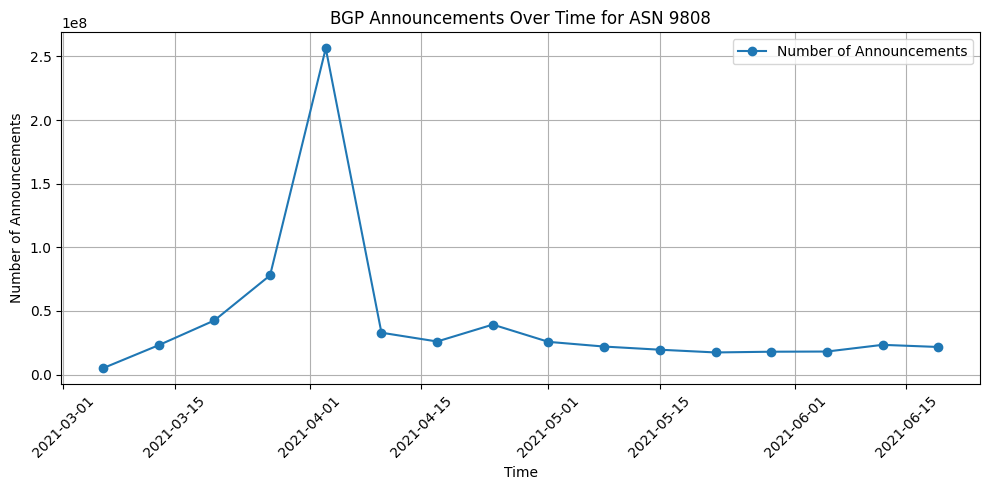

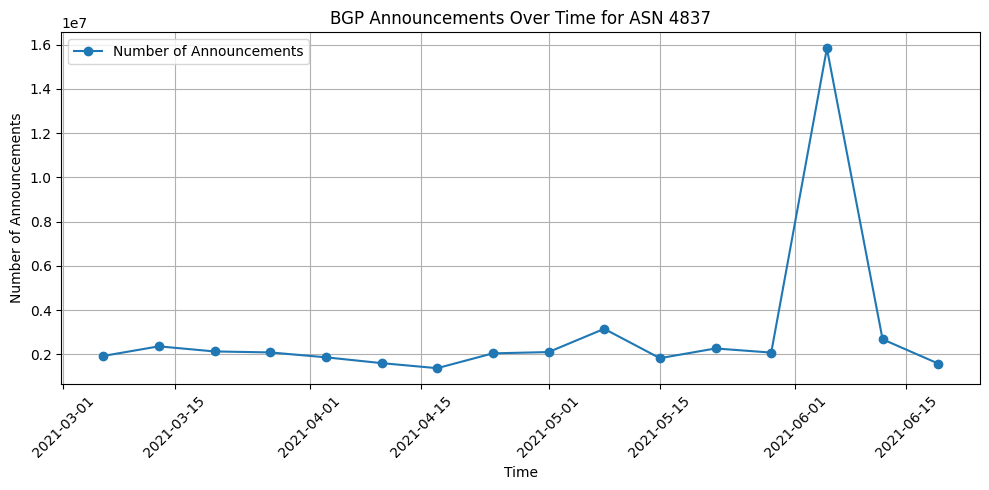

In [18]:
asns = [9808, 4837]
start_date = '2021-03-01'
end_date = '2021-07-01'
plot_bgp_updates(asns, start_date, end_date)

The first two ASNs have a huge number of IP addresses under them. AS134 has ~2.7m IP addresses allocated to Dali out of a total of ~112M, so we do not see a major peak or distortation on the date of the Earthquake which was 2021-05-21. Same goes for AS9808 which has ~40,000 IP addresses in Dali out of ~58M total. So again a major peak can not be seen as increase in number of BGP announcements is smaller than the total number of BGP announcements. However, AS4837, shows a peak on the day of the earthquakes where the BGP announcements rise to around 16 miliion. Even though the number of IP addresses allocated to Dali are ~375k out of a total of 59M, we can see a peak. This may be due to poor delocalization from the ASN. The peak for ASN 9808 can be due to the 25-year cooperation program Program that was signed between China and Iran as the rise of the peak matches the signing date. 